In [ ]:
#Importing neccesary libraries
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [ ]:
#Importing dataset
data=pd.read_csv('series_data.csv')

In [ ]:
#displaying the dataset
data.head()

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


In [ ]:
#Unique data values in dataset
data.dtypes

Poster_Link             object
Series_Title            object
Runtime_of_Series       object
Certificate             object
Runtime_of_Episodes     object
Genre                   object
IMDB_Rating            float64
Overview                object
Star1                   object
Star2                   object
Star3                   object
Star4                   object
No_of_Votes              int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Poster_Link          2000 non-null   object 
 1   Series_Title         2000 non-null   object 
 2   Runtime_of_Series    2000 non-null   object 
 3   Certificate          703 non-null    object 
 4   Runtime_of_Episodes  1957 non-null   object 
 5   Genre                2000 non-null   object 
 6   IMDB_Rating          2000 non-null   float64
 7   Overview             2000 non-null   object 
 8   Star1                2000 non-null   object 
 9   Star2                2000 non-null   object 
 10  Star3                1999 non-null   object 
 11  Star4                1995 non-null   object 
 12  No_of_Votes          2000 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [ ]:
#Sorting the data based on no. of votes and imdb ratings
ratings = data.sort_values(['No_of_Votes'],ascending=False)
imdb=data.sort_values(['IMDB_Rating'],ascending=False)

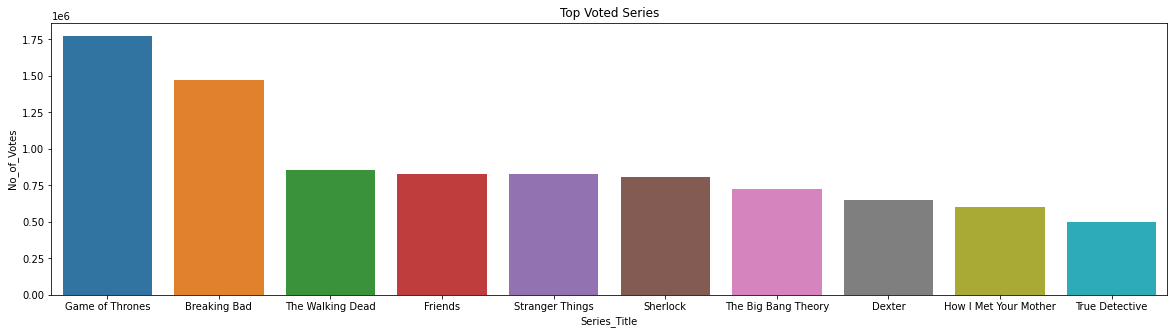

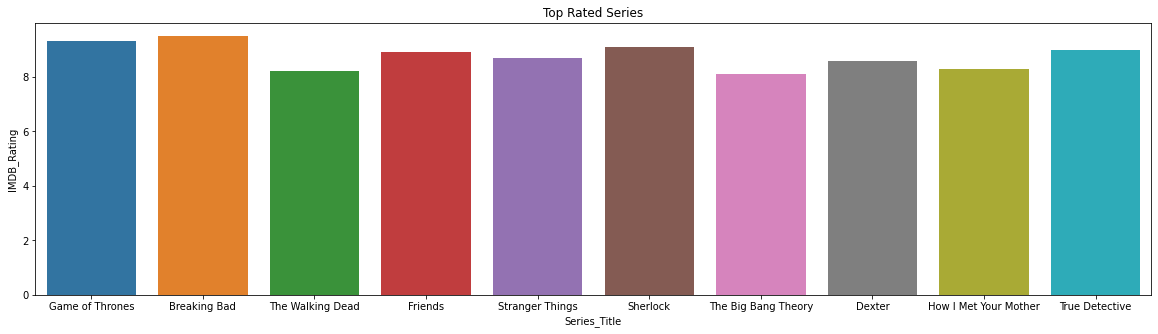

<Figure size 432x288 with 0 Axes>

In [ ]:
#Top Voted and Top Rated Series
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=ratings['Series_Title'][:10],y=ratings['No_of_Votes'][:10])
g.set_title("Top Voted Series")
plt.show()
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=ratings['Series_Title'][:10],y=ratings['IMDB_Rating'][:10])
g.set_title("Top Rated Series")
plt.show()
plt.tight_layout()

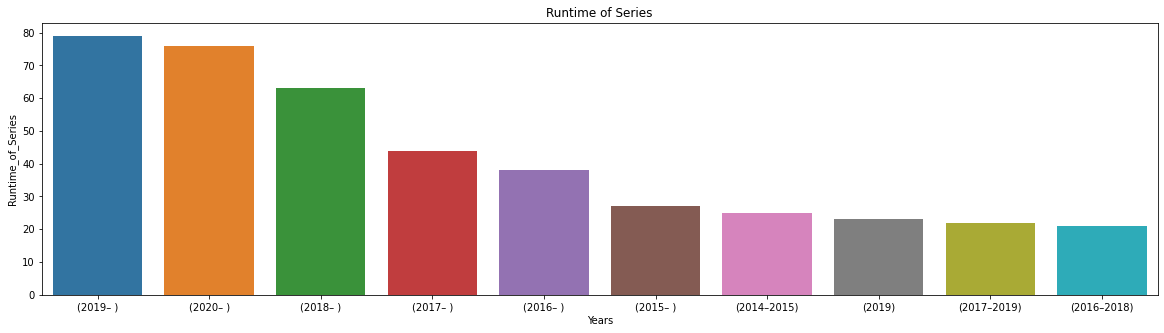

In [ ]:
#Most Runtime_of_Series visualization
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Runtime_of_Series'].value_counts()[:10].index,y=data['Runtime_of_Series'].value_counts()[:10])
g.set_title("Runtime of Series")
g.set_xlabel("Years")
plt.show()

In [ ]:

#Calculation of the duration of a Series from Runtime_of_Series

duration=[]
for x in data["Runtime_of_Series"]:
    p=re.compile('\d+')
    j=p.findall(x) #
    if len(j)==2:
        duration.append(int(j[1])-int(j[0])+1)
    else:
        duration.append(2021-int(j[0])+1)
data['duration']=duration

Text(0.5, 1.0, 'Duration of series')

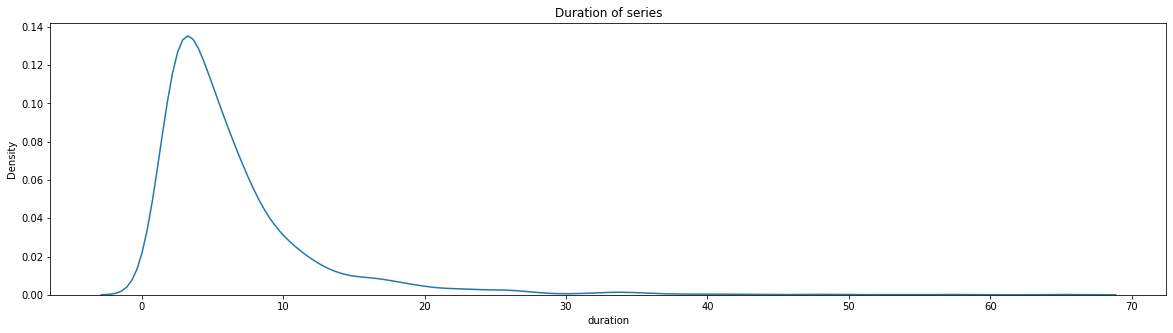

In [ ]:
#KDE plot of duration calculated
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(data['duration'])
g.set_title("Duration of series")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


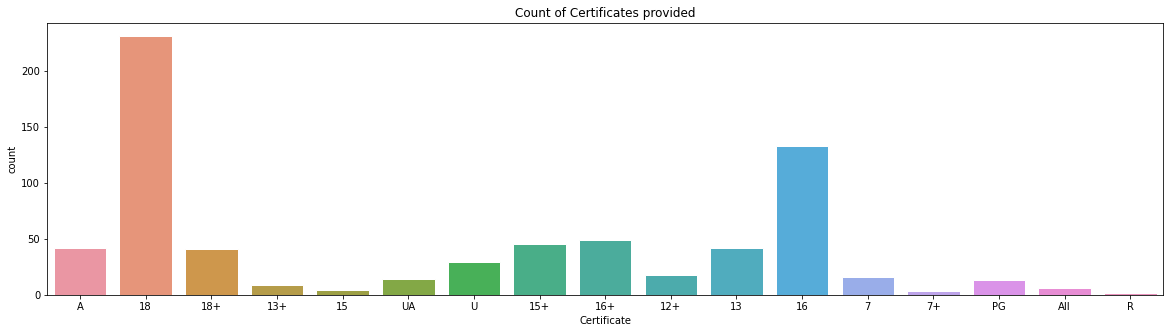

In [ ]:
#Counting the frequency of various certificates provided to these series
#As there are a lots of NaN values in the Certificate Column, renaming it to 'Not Rated'
data['Certificate']=data['Certificate'].fillna('Not Rated')

#Visualizing all the certificates except 'Not Rated' category
ratings=data[data['Certificate']!='Not Rated']['Certificate']
fig,axs=plt.subplots(figsize=(20,5))
sns.set_style('darkgrid')
g=sns.countplot(ratings)
g.set_title("Count of Certificates provided")
plt.show()

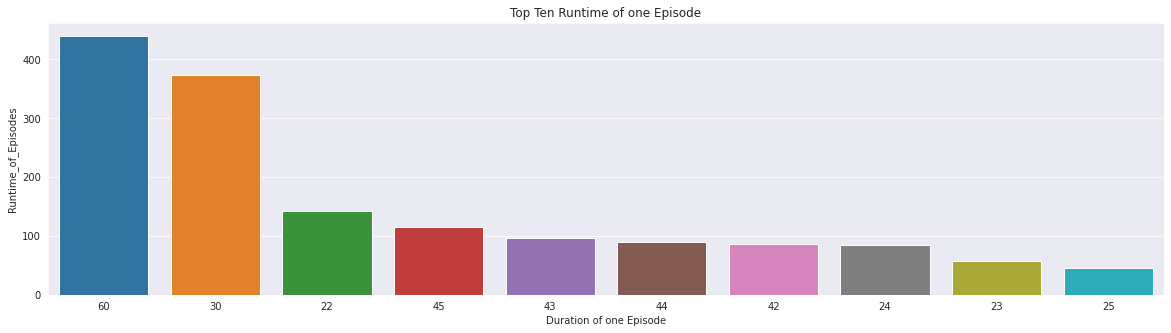

In [ ]:
#Top ten Runtime_of_Episodes
run_inmin=data['Runtime_of_Episodes'].apply(lambda x:str(x).split(" ")[0])
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=run_inmin.value_counts()[:10].index,y=run_inmin.value_counts()[:10])
g.set_xlabel("Duration of one Episode")
g.set_title("Top Ten Runtime of one Episode")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


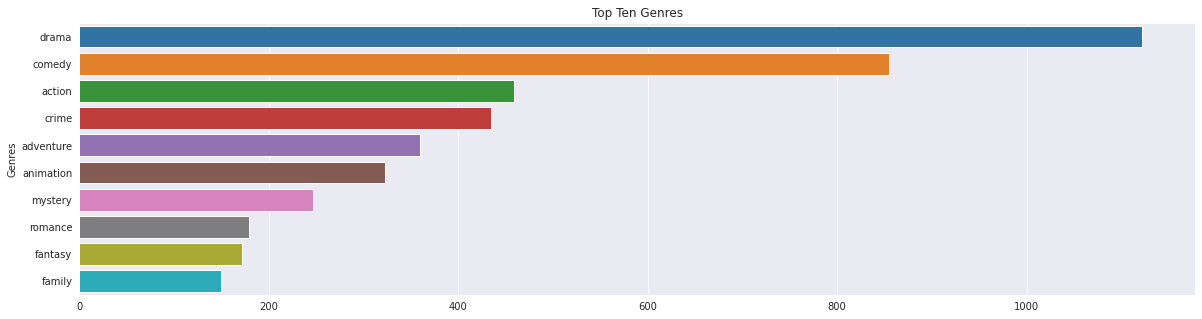

In [ ]:
#Most Common Genres of Series

# Creating a list of all the Genres
genre=[]
for x in data['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())
# Finding the Count of these Genres
count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))
# Visualizing the plot
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Genres")
g.set_title("Top Ten Genres")
plt.show()

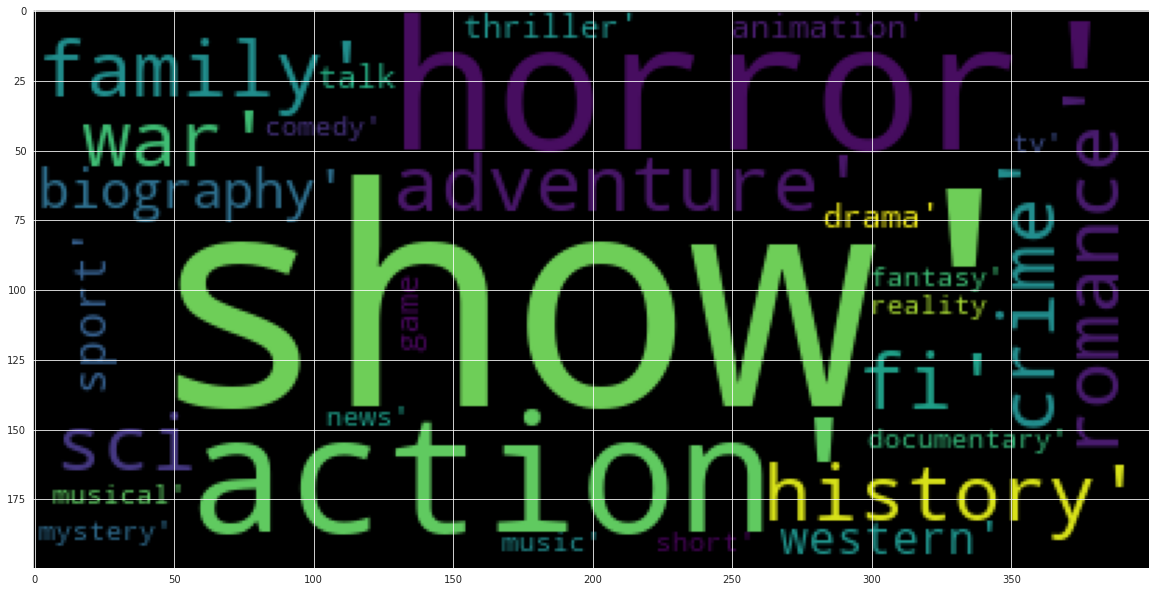

In [ ]:
#Word Cloud of the Genres

from wordcloud import WordCloud
text=set(genre)
wordc=WordCloud(max_words=1500,background_color='black').generate(str(text))
fig,axs=plt.subplots(figsize=(20,20))
sns.set_style('dark')
plt.imshow(wordc)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


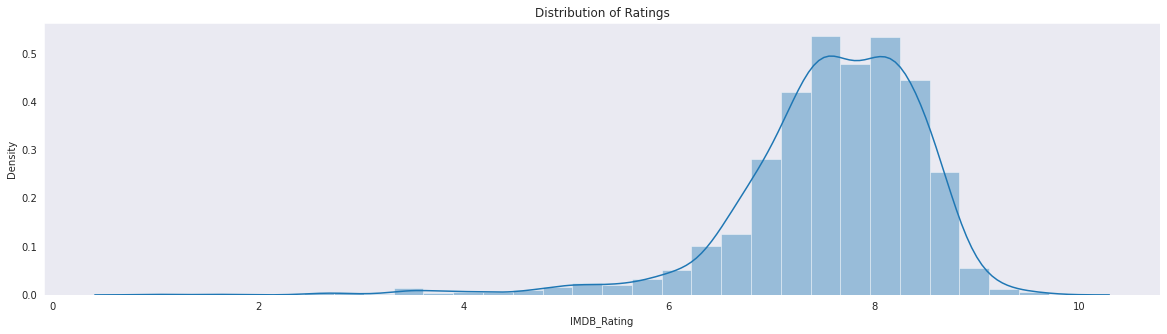

In [ ]:
#Distribution of IMDb Ratings of the Series
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings")
plt.show()

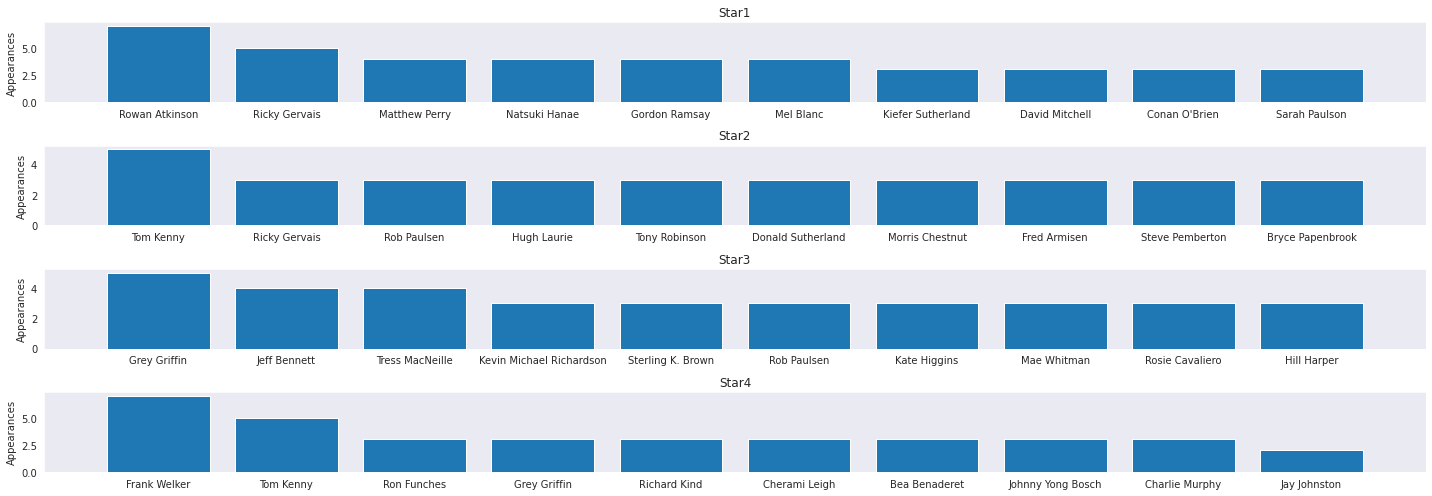

In [ ]:
#Most Occurence of Stars
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances")
    ax+=1
    plt.tight_layout()

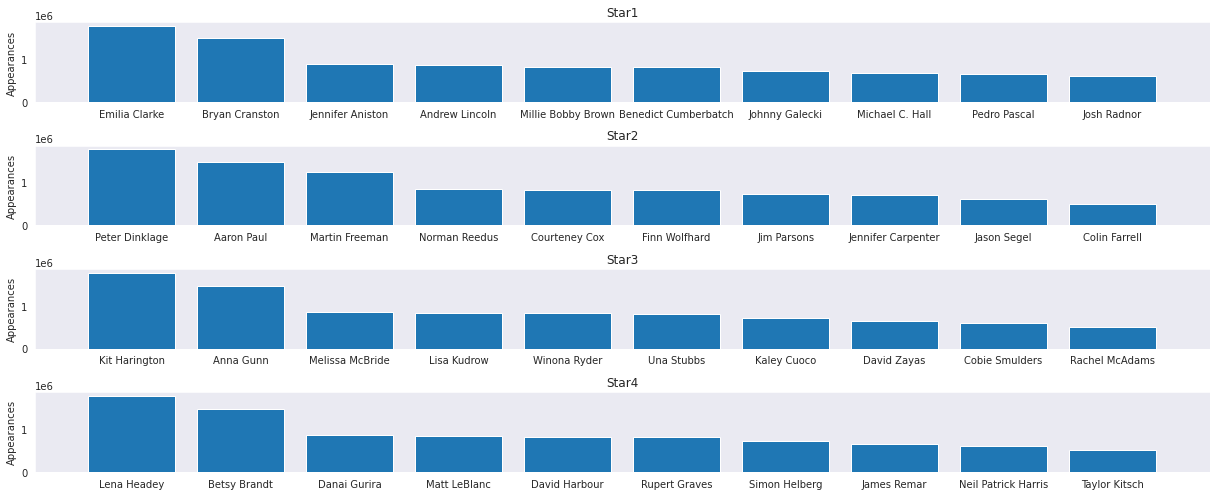

In [ ]:
#Stars of Top Voted Series
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(17,7))
ax=0
for x in stars:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances")
    ax+=1
    plt.tight_layout()

In [ ]:
#Importing TfidVectorizer and to generate the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(stop_words='english')
cvm=cv.fit_transform(data['Overview'])
cvm.shape

(2000, 8089)

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

In [ ]:
#Importing linear_kernel to find the similarity of the data
from sklearn.metrics.pairwise import linear_kernel
sim=linear_kernel(cvm,cvm)

In [ ]:
indices=pd.Series(data.index,index=data['Series_Title']).drop_duplicates()

In [ ]:
def get_recommendations(title, sim=sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    test_keys =list(data['Series_Title'].iloc[movie_indices])
    test_values =list(data['Poster_Link'].iloc[movie_indices])

    res = {test_keys[i]: test_values[i] for i in range(len(test_keys))}


    return res

In [ ]:
get_recommendations('The Big Bang Theory')

{'Insecure': 'https://m.media-amazon.com/images/M/MV5BYmJlZGEyZDctZTA1Yy00MzExLTk0ZWMtMjgwNjAwMGU1ZjRjXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg',
 'Miranda': 'https://m.media-amazon.com/images/M/MV5BOTQyMzA1Nzg4Ml5BMl5BanBnXkFtZTcwNTQxMTg4Mw@@._V1_UY98_CR1,0,67,98_AL_.jpg',
 'New Girl': 'https://m.media-amazon.com/images/M/MV5BMjA0MDc1NTk0Ml5BMl5BanBnXkFtZTgwMTk2ODA5NDM@._V1_UY98_CR5,0,67,98_AL_.jpg',
 'Adam Ruins Everything': 'https://m.media-amazon.com/images/M/MV5BMTEyNzQyNzQyNjJeQTJeQWpwZ15BbWU4MDEwMjIyOTYx._V1_UX67_CR0,0,67,98_AL_.jpg',
 "Three's Company": 'https://m.media-amazon.com/images/M/MV5BOTgyMjM3NjEzNl5BMl5BanBnXkFtZTcwMzIyNjAwMQ@@._V1_UY98_CR1,0,67,98_AL_.jpg',
 'Ridiculousness': 'https://m.media-amazon.com/images/M/MV5BMGUxYmI2NGItOWU0My00MWZmLWFhODYtYjVjOGVjNDdlNTVkXkEyXkFqcGdeQXVyNjc3MDk1NjY@._V1_UX67_CR0,0,67,98_AL_.jpg',
 'Drake & Josh': 'https://m.media-amazon.com/images/M/MV5BMTkyNDg4MDE0M15BMl5BanBnXkFtZTcwMzYxNjcyMQ@@._V1_UY98_CR1,0,67,98_AL_.jpg

In [ ]:
list(a)

['Insecure',
 'Miranda',
 'New Girl',
 'Adam Ruins Everything',
 "Three's Company",
 'Ridiculousness',
 'Drake & Josh',
 'Doc Martin',
 'Top Gear USA',
 'The Life & Times of Tim']

In [ ]:
get_recommendations('Friends')

['Ally McBeal',
 'Master of None',
 'Derry Girls',
 'The Drew Carey Show',
 "Grey's Anatomy",
 'Good Girls Revolt',
 'Chicago Fire',
 '6Teen',
 'The Muppets.',
 'The Knick']

In [ ]:
get_recommendations('La casa de papel')

1131                          The Royals
1488                  American Housewife
1807                         Wacky Races
1335    Scooby-Doo! Mystery Incorporated
106                                 Glee
284              The Shannara Chronicles
1864                               Jonas
174                                   Oz
319                                Élite
530                  Kenpû Denki Berserk
Name: Series_Title, dtype: object

In [ ]:
# Feedback
from textblob import TextBlob
import nltk



In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
obj = TextBlob("One time watch")
ans = obj.sentiment.polarity
if ans == 0: #NEUTRAL
    print("Neutral")
elif ans<0:  #BAD
    print("Bad")
else:        #GOOD
    print("Good")

Neutral
